**Analysing Supermarket sales data to optmize marketing campaigns, maximize customer loyalty and thus increase sales** 
<br>Author: Anant Gupta 

# Step 1: import relevant libraries and dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sale_data=pd.read_csv("sales_data.csv")

# Step2: data understanding and preprocessing

In [4]:
sale_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
sale_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [6]:
sale_data['Date'] = pd.to_datetime(sale_data['Date'])
sale_data['Time'] = pd.to_datetime(sale_data['Time'])

In [7]:
sale_data.drop(columns=["gross margin percentage","gross income", "Tax 5%", "Total"],inplace=True)

In [8]:
sale_data.describe()

,Unit price,Quantity,cogs,Rating
count,1000.000000,1000.000000,1000.00000,1000.00000
mean,55.672130,5.510000,307.58738,6.97270
std,26.494628,2.923431,234.17651,1.71858
min,10.080000,1.000000,10.17000,4.00000
25%,32.875000,3.000000,118.49750,5.50000
50%,55.230000,5.000000,241.76000,7.00000
75%,77.935000,8.000000,448.90500,8.50000
max,99.960000,10.000000,993.00000,10.00000


In [9]:
categorical_cols=[col for col in sale_data.columns if sale_data[col].dtype==object and col!='Invoice ID']
for col in categorical_cols:
    print(sale_data[col].value_counts())

A    340
B    332
C    328
Name: Branch, dtype: int64
Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64
Member    501
Normal    499
Name: Customer type, dtype: int64
Female    501
Male      499
Name: Gender, dtype: int64
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64
Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64


# Step 3: Exploratory Data Analysis(EDA) 
different types of insights gained through corresponding visualization in this project are listed below

## a) Customer Behaviour Insights 

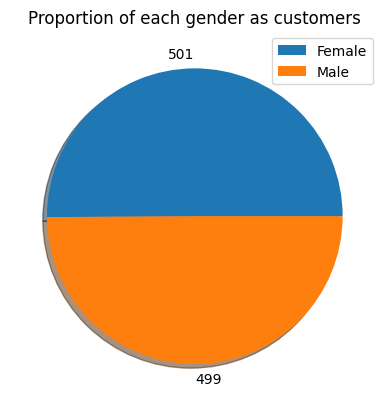

In [36]:
plt.pie(sale_data['Gender'].value_counts(),labels= sale_data['Gender'].value_counts(),shadow=True)
plt.legend(sale_data['Gender'].unique())
plt.title("Proportion of each gender as customers")
plt.show()

* both genders are nearly equal in ratio as customers

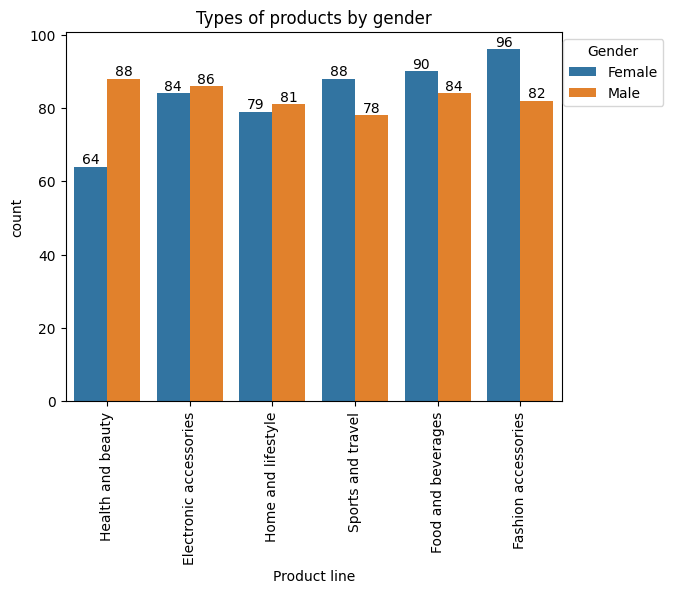

In [11]:
ax=sns.countplot(x="Product line", hue = "Gender", data =sale_data)
ax.set_title("Types of products by gender") 
for p in ax.patches:
    ax.annotate(format(p.get_height(),'.0f'),(p.get_x() + p.get_width()/2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5),textcoords = 'offset points')
plt.xticks(rotation='vertical')
plt.legend(title="Gender", bbox_to_anchor=(0.989, 1),loc='upper left')
plt.show()

* males buy "Health and beauty" type of products the most and "Sports and travel" type of products the least.
* females buy "Fashion accessories" type of products the most and "Health and beauty" type of products the least. 

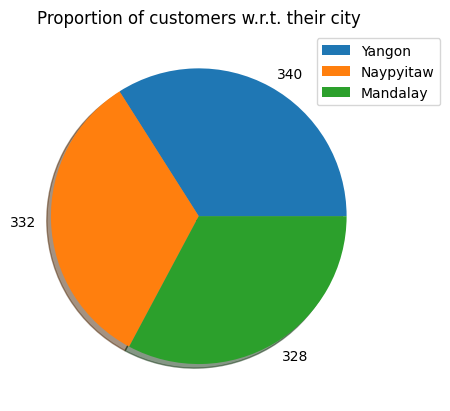

In [37]:
plt.pie(sale_data['City'].value_counts(),labels= sale_data['City'].value_counts(),shadow=True)
plt.legend(sale_data['City'].unique(),bbox_to_anchor=(0.8,1))
plt.title("Proportion of customers w.r.t. their city")
plt.show()

* The yangon city has highest concentration of customers.

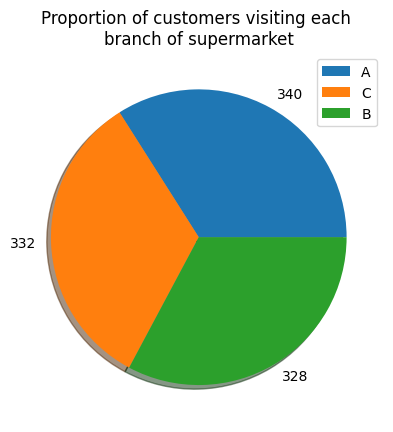

In [40]:
plt.pie(sale_data['Branch'].value_counts(),labels= sale_data['Branch'].value_counts(),shadow=True)
plt.legend(sale_data['Branch'].unique())
plt.title("Proportion of customers visiting each \nbranch of supermarket")
plt.show()

* Branch A of supermarket has highest concentration of customers.

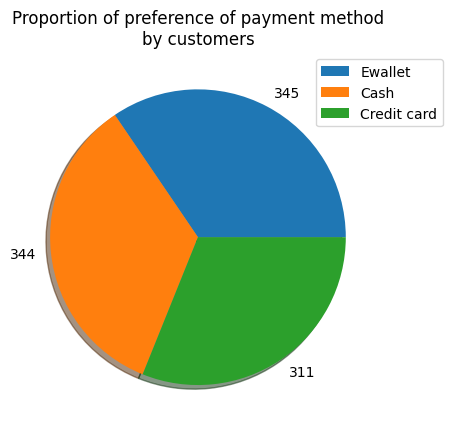

In [42]:
plt.pie(sale_data['Payment'].value_counts(),labels= sale_data['Payment'].value_counts(),shadow=True)
plt.legend(sale_data['Payment'].unique(),bbox_to_anchor=(0.8, 1))
plt.title("Proportion of preference of payment method\nby customers")
plt.show()

* Customers prefer to pay more using Ewallet or Cash than Credit card.

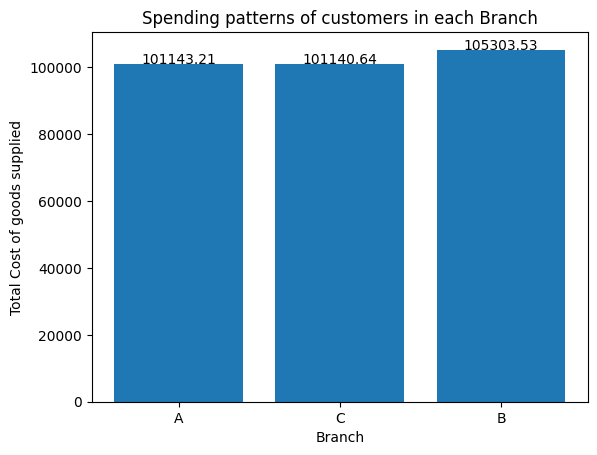

In [15]:
plt.bar(sale_data["Branch"].unique(), sale_data.groupby("Branch")["cogs"].agg(np.sum))
for i in range(len(sale_data.groupby("Branch")["cogs"].agg(np.sum))):
    plt.text(i,sale_data.groupby("Branch")["cogs"].agg(np.sum)[i],round(sale_data.groupby("Branch")["cogs"].agg(np.sum)[i],2),ha="center")
plt.title('Spending patterns of customers in each Branch')
plt.xlabel('Branch')
plt.ylabel('Total Cost of goods supplied')
plt.show()

* B branch of the supermarket earns more than any other branch

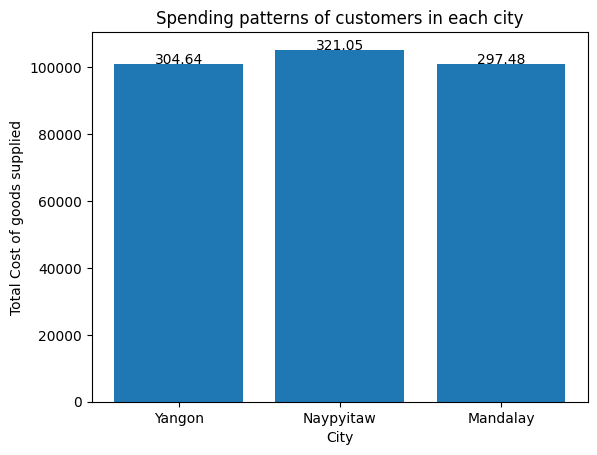

In [16]:
plt.bar(sale_data["City"].unique(), sale_data.groupby("City")["cogs"].agg(np.sum))
for i in range(len(sale_data.groupby("City")["cogs"].agg(np.sum))):
    plt.text(i,sale_data.groupby("City")["cogs"].agg(np.sum)[i],round(sale_data.groupby("City")["cogs"].agg(np.mean)[i],2),ha="center")
plt.title('Spending patterns of customers in each city')
plt.xlabel('City')
plt.ylabel('Total Cost of goods supplied')
plt.show()

* Customers of Naypyitaw spend more than any other city

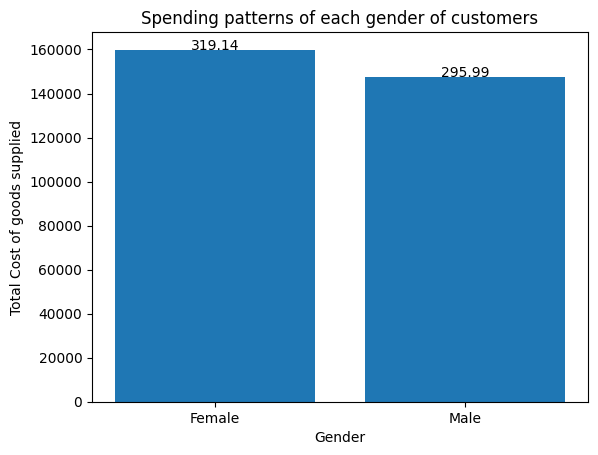

In [47]:
plt.bar(sale_data["Gender"].unique(), sale_data.groupby("Gender")["cogs"].agg(np.sum))
for i in range(len(sale_data.groupby("Gender")["cogs"].agg(np.sum))):
    plt.text(i,sale_data.groupby("Gender")["cogs"].agg(np.sum)[i],round(sale_data.groupby("Gender")["cogs"].agg(np.mean)[i],2),ha="center")
plt.title('Spending patterns of each gender of customers')
plt.xlabel('Gender')
plt.ylabel('Total Cost of goods supplied')
plt.show()

* Females spend more than males 

## b) Membership insights

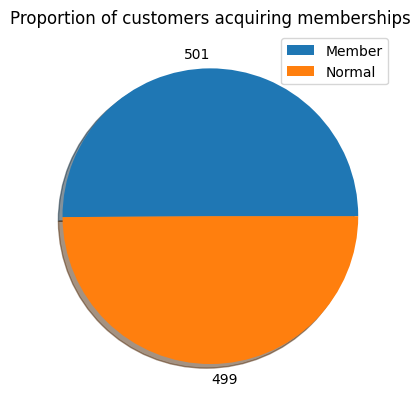

In [43]:
plt.pie(sale_data['Customer type'].value_counts(),labels= sale_data['Customer type'].value_counts(),shadow=True)
plt.legend(sale_data['Customer type'].unique())
plt.title("Proportion of customers acquiring memberships")
plt.show()

* There are slightly more members than non-member customers

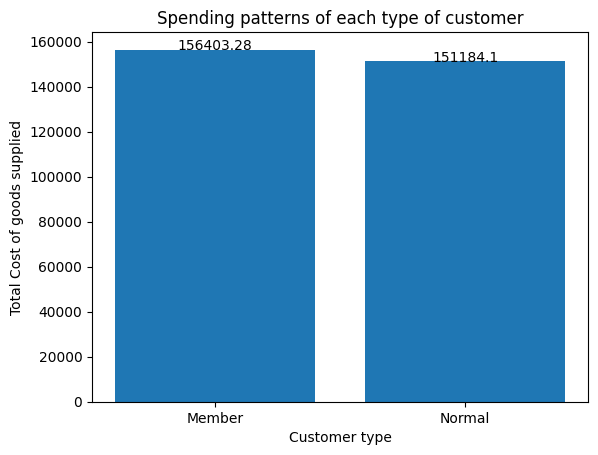

In [18]:
plt.bar(sale_data["Customer type"].unique(), sale_data.groupby("Customer type")["cogs"].agg(np.sum))
for i in range(len(sale_data.groupby("Customer type")["cogs"].agg(np.sum))):
    plt.text(i,sale_data.groupby("Customer type")["cogs"].agg(np.sum)[i],round(sale_data.groupby("Customer type")["cogs"].agg(np.sum)[i],2),ha="center")
plt.title('Spending patterns of each type of customer')
plt.xlabel('Customer type')
plt.ylabel('Total Cost of goods supplied')
plt.show()

* Members spend more than non member customers

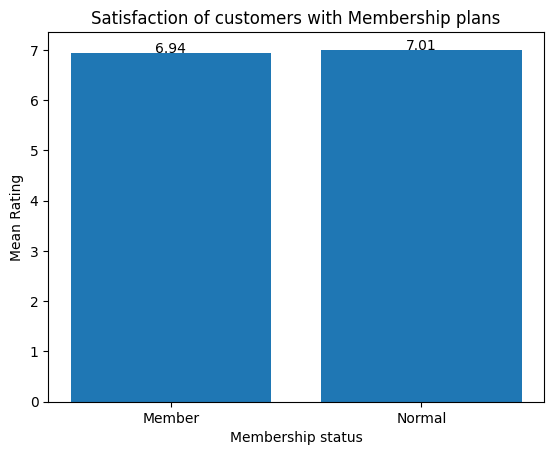

In [19]:
plt.bar(sale_data["Customer type"].unique(), sale_data.groupby("Customer type")["Rating"].agg(np.mean))
for i in range(len(sale_data.groupby("Customer type")["Rating"].agg(np.mean))):
    plt.text(i,sale_data.groupby("Customer type")["Rating"].agg(np.mean)[i],round(sale_data.groupby("Customer type")["Rating"].agg(np.mean)[i],2),ha="center")
plt.title('Satisfaction of customers with Membership plans')
plt.xlabel('Membership status')
plt.ylabel('Mean Rating')
plt.show()

* members are relatively less satisfied with the products than the Non-Member customers

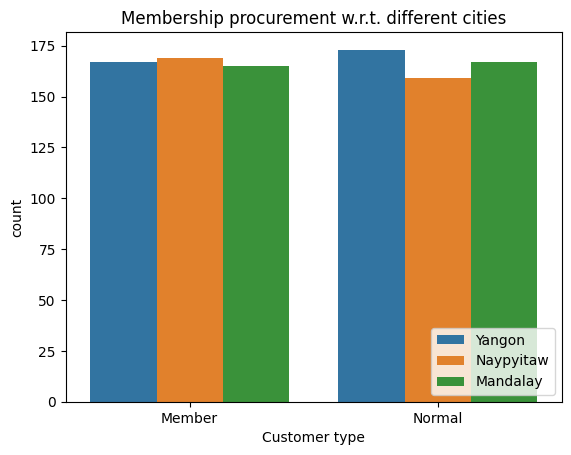

In [20]:
 sns.countplot(x="Customer type", hue = "City", data =sale_data)
 plt.title("Membership procurement w.r.t. different cities") 
 plt.legend(loc='lower right')

* There are more members in 'Naypyitaw' than in any other city

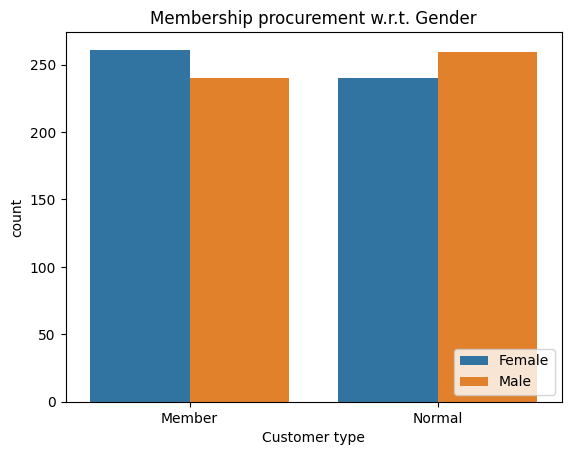

In [21]:
 sns.countplot(x="Customer type", hue = "Gender", data =sale_data)
 plt.title("Membership procurement w.r.t. Gender") 
 plt.legend(loc='lower right')
 plt.show()

* Females are more interested in acquiring memberships than males 


## c) Product insights

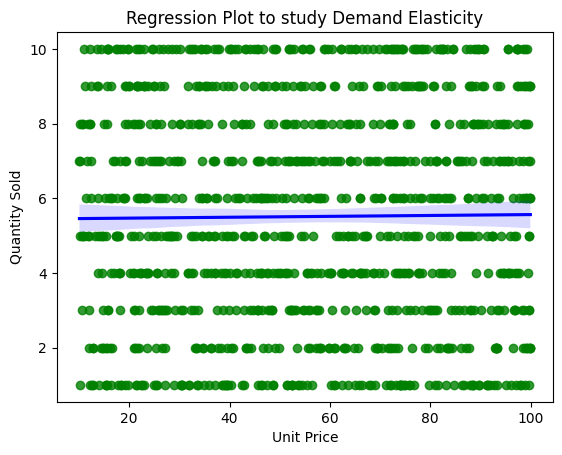

In [22]:
sns.regplot(x="Unit price", y="Quantity", data=sale_data, color='green',line_kws={"color":"blue"})
plt.title('Regression Plot to study Demand Elasticity')
plt.xlabel('Unit Price')
plt.ylabel('Quantity Sold')
plt.show()

In [23]:
sale_data['Unit price'].corr(sale_data['Quantity'])

0.01077756434249728

* the quantity increases by a factor of 0.01078 upon increasing the unit price.

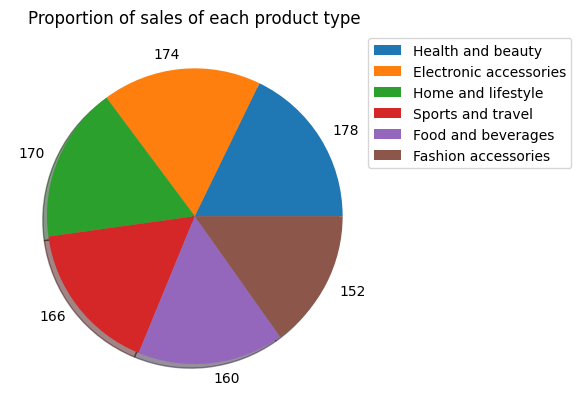

In [45]:
plt.pie(sale_data['Product line'].value_counts(),labels= sale_data['Product line'].value_counts(),shadow=True)
plt.title("Proportion of sales of each product type")
plt.legend(sale_data['Product line'].unique(), bbox_to_anchor=(0.95,1))
plt.show()

* 'Health and beauty' and 'Electronics' are the most selling product types

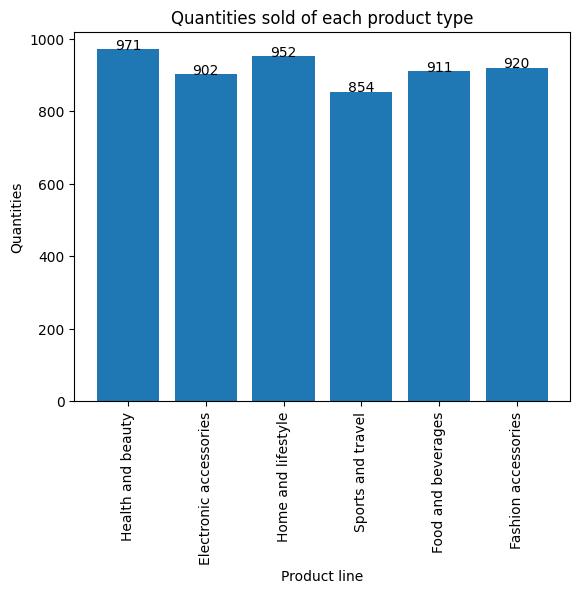

In [25]:
plt.bar(sale_data["Product line"].unique(), sale_data.groupby("Product line")["Quantity"].agg(np.sum))
for i in range(len(sale_data.groupby("Product line")["Quantity"].agg(np.sum))):
    plt.text(i,sale_data.groupby("Product line")["Quantity"].agg(np.sum)[i],round(sale_data.groupby("Product line")["Quantity"].agg(np.sum)[i],2),ha="center")
plt.title('Quantities sold of each product type')
plt.xlabel('Product line')
plt.ylabel('Quantities')
plt.xticks(rotation="vertical")
plt.show()

* "Health and beauty" type of products are sold in the most quantity while "Sports and travel" are sold in least quantity 

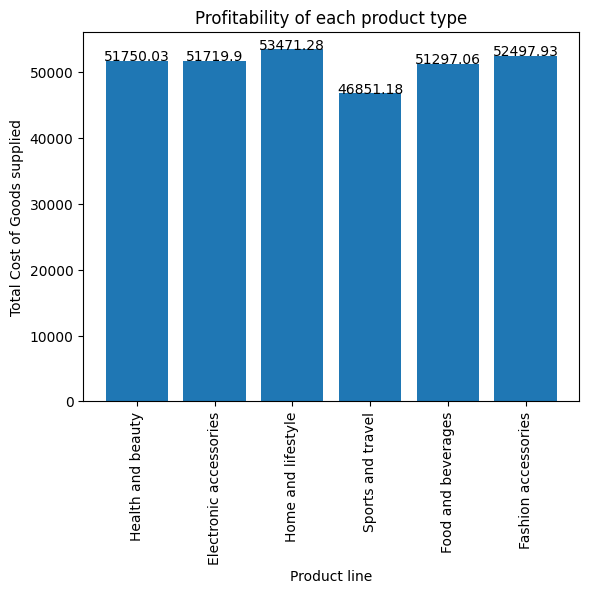

In [26]:
plt.bar(sale_data["Product line"].unique(), sale_data.groupby("Product line")["cogs"].agg(np.sum))
for i in range(len(sale_data.groupby("Product line")["Rating"].agg(np.sum))):
    plt.text(i,sale_data.groupby("Product line")["cogs"].agg(np.sum)[i],round(sale_data.groupby("Product line")["cogs"].agg(np.sum)[i],2),ha="center")
plt.title('Profitability of each product type')
plt.xlabel('Product line')
plt.ylabel('Total Cost of Goods supplied')
plt.xticks(rotation="vertical")
plt.show()

* "Home and lifestyle" type of products are the most profitable and "Sports and travel" type are the least profitable.

## d) Customer Satisfaction and loyalty related insights

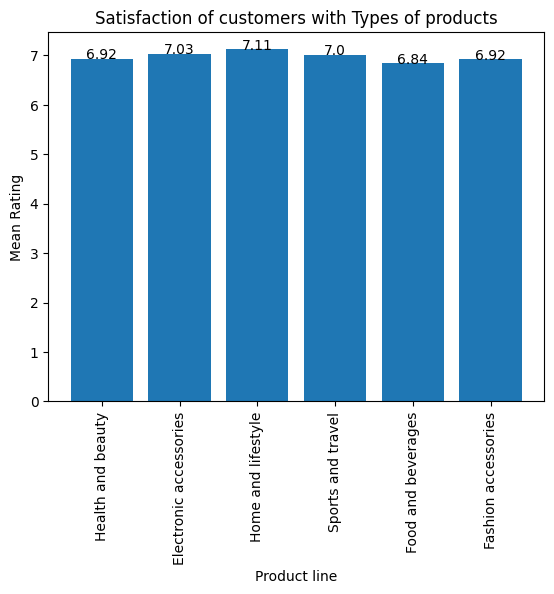

In [27]:
plt.bar(sale_data["Product line"].unique(), sale_data.groupby("Product line")["Rating"].agg(np.mean))
for i in range(len(sale_data.groupby("Product line")["Rating"].agg(np.mean))):
    plt.text(i,sale_data.groupby("Product line")["Rating"].agg(np.mean)[i],round(sale_data.groupby("Product line")["Rating"].agg(np.mean)[i],2),ha="center")
plt.title('Satisfaction of customers with Types of products')
plt.xlabel('Product line')
plt.ylabel('Mean Rating')
plt.xticks(rotation="vertical")
plt.show()

* People are most satisfied with 'Home and lifestyle'and least satisfied with 'Food and bevarages' type of products

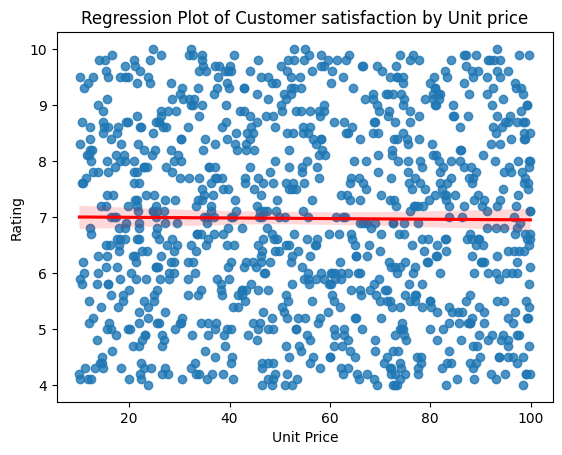

In [28]:
sns.regplot(x="Unit price", y="Rating", data=sale_data,line_kws={"color":"red"})
plt.title('Regression Plot of Customer satisfaction by Unit price')
plt.xlabel('Unit Price')
plt.ylabel('Rating')
plt.show()

In [29]:
sale_data['Unit price'].corr(sale_data['Rating'])

-0.008777507200778951

* The correlation coefficient suggests that customer satisfaction decreases with increase in unit price. 

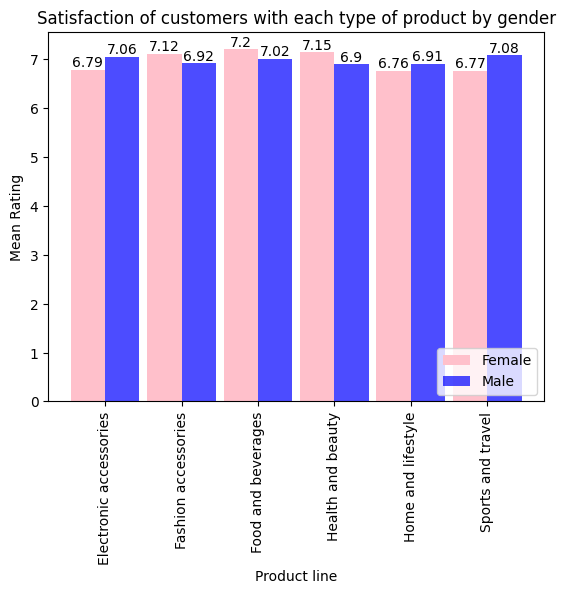

In [30]:
mean_ratings = sale_data.groupby(["Gender", "Product line"])["Rating"].mean().unstack()
fig, ax = plt.subplots()
bar_width = 0.45
ax.bar(np.arange(len(mean_ratings.columns)), mean_ratings.loc["Female"], width=bar_width, color='pink', label='Female')
ax.bar(np.arange(len(mean_ratings.columns)) + bar_width, mean_ratings.loc["Male"], width=bar_width, color='blue', label='Male', alpha=0.7)  # Set alpha for transparency
for i, rating in enumerate(mean_ratings.loc["Female"]):
    ax.text(i, rating, round(rating, 2), ha="center", va="bottom")
for i, rating in enumerate(mean_ratings.loc["Male"]):
    ax.text(i + bar_width, rating, round(rating, 2), ha="center", va="bottom")
plt.title('Satisfaction of customers with each type of product by gender')
plt.xlabel('Product line')
plt.ylabel('Mean Rating')
plt.xticks(np.arange(len(mean_ratings.columns)) + bar_width / 2, mean_ratings.columns, rotation='vertical')
plt.legend(loc="lower right")
plt.show()

* Males are most satisfied with 'Fashion accessories' and least satisfied with 'Electronic accessories'. 
* Females are most satisfied with 'Home and lifestyle' and least satisfied with 'Fashion accessories'. 

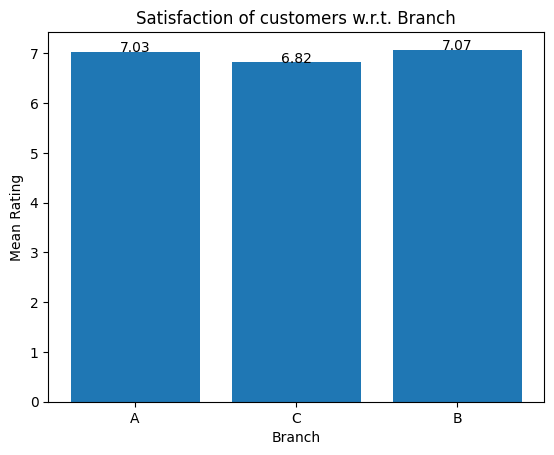

In [31]:
plt.bar(sale_data["Branch"].unique(), sale_data.groupby("Branch")["Rating"].agg(np.mean))
for i in range(len(sale_data.groupby("Branch")["Rating"].agg(np.mean))):
    plt.text(i,sale_data.groupby("Branch")["Rating"].agg(np.mean)[i],round(sale_data.groupby("Branch")["Rating"].agg(np.mean)[i],2),ha="center")
plt.title('Satisfaction of customers w.r.t. Branch')
plt.xlabel('Branch')
plt.ylabel('Mean Rating')
plt.show()

* branch B has the highest rating.

## e) Analysing Optimal marketing campaign timings 

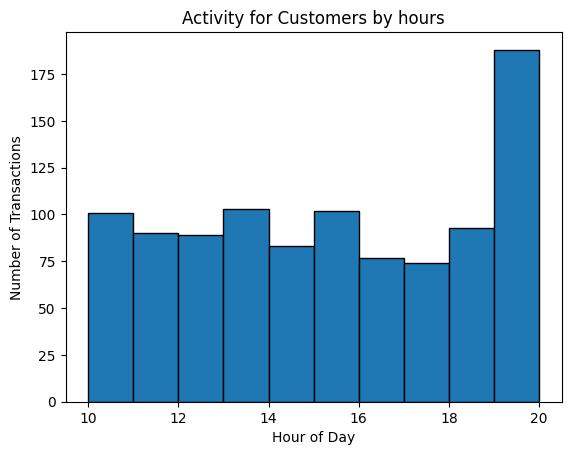

In [32]:
sale_data['Hour'] = sale_data['Time'].dt.hour
plt.hist(sale_data['Hour'], bins=10, edgecolor='black')
plt.title('Activity for Customers by hours')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.show()

* Customers are the most active at the supermarket at 19th hour i.e. between 7pm and 8pm.

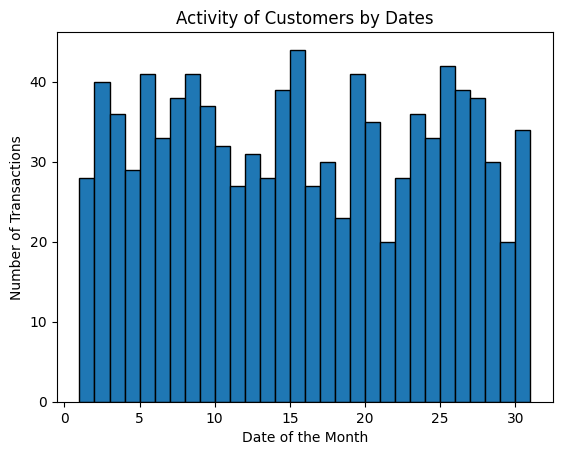

In [33]:
sale_data['Day'] = sale_data['Date'].dt.day
plt.hist(sale_data['Day'], bins=range(1, 32), edgecolor='black')
plt.title('Activity of Customers by Dates')
plt.xlabel('Date of the Month')
plt.ylabel('Number of Transactions')
plt.show()

* Customers are most active at the supermarket at around 15th of every month